In [1]:
import pandas as pd
import numpy as np

In [12]:
# 1. Reading the CSV File:
# load data, get rid of first row
data = pd.read_csv('/content/acc_players-2324F.csv')
df = pd.DataFrame(data.values[1:], columns=data.values[0])
df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [15]:
# 2. Basic Analysis:

# calculate the total points scored by all players combined
total_points = df['PTS'].sum()
print("Total Points: ", total_points)

# find the player who has played the most minutes (MP)
most_minutes_player = df.loc[df['MP'].idxmax()]['Player']
print("\nPlayer with Most Minutes: ", most_minutes_player)

# identify the top 5 players in terms of total rebounds (TRB)
df['TRB'] = pd.to_numeric(df['TRB'], errors='coerce')
top_5_rebounds = df.nlargest(5, 'TRB')['Player']
print("\nTop 5 Players by Total Rebounds:")
print(top_5_rebounds)

Total Points:  34216432165389548623841915798211970305111552957727126794714564604470118384152039616623830726339278429425322156039182276112156591472071777714823628554544125219363140250659171047859326184834609677336616463834136245101534024926103072404399304464340245820394156731629223386005142368405542332925211545137602382564552510903590292811260772341548528333135408155263795952195533547531326963748917141168434144361306365336000225442608752283458159310811810024024714351466123571969717015651154810040877

Player with Most Minutes:  Ian Schieffelin

Top 5 Players by Total Rebounds:
5        Armando Bacot
178    Ian Schieffelin
90     Harrison Ingram
44      Mohamed Diarra
149      Norchad Omier
Name: Player, dtype: object


In [20]:
# 3. Player Filtering:

# create a new DataFrame containing only players who played more than 500 minutes
df['MP'] = pd.to_numeric(df['MP'], errors='coerce')
elite_players = df[df['MP'] > 500]

# from this filtered DataFrame, determine the player with the highest total assists (AST)
highest_assists = elite_players.loc[elite_players['AST'].idxmax()]['Player']
print("\nElite Player with Highest Total Assists: ", highest_assists)

# who are the top 3 Assist Leads in the League?
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')
top_3_assist_leads = elite_players.nlargest(3, 'AST')['Player']
print("\nTop 3 Assist Leads in the League:")
print(top_3_assist_leads)

# who are the top 3 shot blockers?
df['BLK'] = pd.to_numeric(df['BLK'], errors='coerce')
top_3_block_leads = df.nlargest(3, 'BLK')['Player']
print("\nTop 3 Shot Blockers:")
print(top_3_block_leads)


Elite Player with Highest Total Assists:  Reece Beekman

Top 3 Assist Leads in the League:
7       Reece Beekman
215    Jaeden Zackery
21      Elliot Cadeau
Name: Player, dtype: object

Top 3 Shot Blockers:
51         Ryan Dunn
157     Quinten Post
5      Armando Bacot
Name: Player, dtype: object


In [24]:
# 4. School-Based Analysis:
# group the players by School and calculate the total points scored by each school
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
school_points = df.groupby('School')['PTS'].sum()
print("\nTotal Points by School:")
print(school_points)

# group the players by school and calculate the total assists (AST) for each team
school_assists = df.groupby('School')['AST'].sum()
print("\nTotal Assists by School:")
print(school_assists)

# sore the schools by total points scored and display the top 3 schools
top_3 = school_points.nlargest(3)
print("\nTop 3 Schools by Total Points:")
print(top_3)


Total Points by School:
School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64

Total Assists by School:
School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64

Top 3 Schools by Total Points:
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


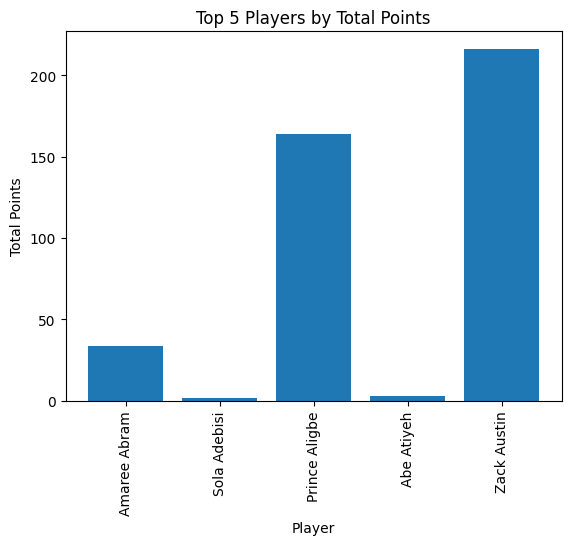

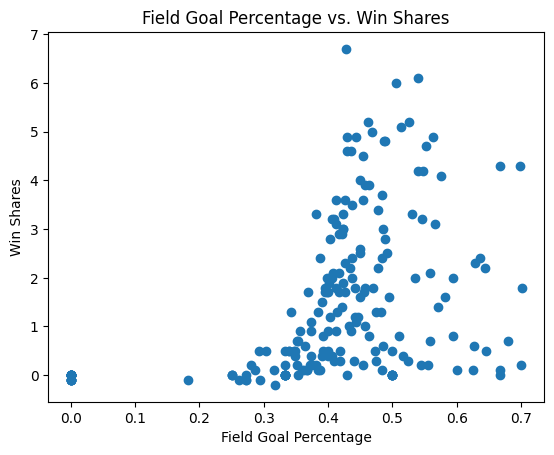


Correlation between FG% and WS:  0.4210663894199787


In [26]:
import matplotlib.pyplot as plt

# 5. Extra Credit (Bonus):
# create a bar chart showing the top 5 players by total points scored (PTS)
plt.bar(df['Player'][:5], df['PTS'][:5])
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.title('Top 5 Players by Total Points')
plt.xticks(rotation=90)
plt.show()

# correlation: investigate whether there is any correlation between a player's field goal percentage (FG%) and their wins shares (WS). Provide a scarrer plot and calculate the correlation coefficient
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')
df['WS'] = pd.to_numeric(df['WS'], errors='coerce')
plt.scatter(df['FG%'], df['WS'])
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.title('Field Goal Percentage vs. Win Shares')
plt.show()

correlation = df['FG%'].corr(df['WS'])
print("\nCorrelation between FG% and WS: ", correlation)